# Prediciting $CO_{2}$ Emission Using Linear Regression Model


***




In [191]:
#Libraries for data analysis
import pandas as pd
import numpy as np

#plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("GnBu_d")
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['figure.dpi'] = 100
plt.rcParams["axes.spines.top"] = True
plt.rcParams["axes.spines.right"] = True

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#to split the data
from sklearn.model_selection import train_test_split

#scaling
from sklearn.preprocessing import StandardScaler

# to scale numerical values
from sklearn.impute import SimpleImputer

# to impute missing values in Data
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# to convert categorical features into numerical feature
from sklearn.pipeline import Pipeline

# to build a data preprocessing pipeline
from sklearn.compose import ColumnTransformer
import os


#regression model
from sklearn.linear_model import LinearRegression


#metrics
from sklearn.metrics import mean_squared_error, r2_score

**Below is the data dictionary for our 12 features:**

-   **Make** = Company of the vehicle

-   **Model** = Model of the car

-   **Vehicle Class** = Class of vehicle depending on their utility, capacity and weight

-   **Engine Size(L)** = Size of engine used in Litre

-   **Cylinders** = Number of cylinders

-   **Transmission** = Transmission type with number of gears

-   **Fuel Type** = Type of Fuel used

-   **Fuel Consumption City (L/100 km)** = Fuel consumption in city roads (L/100 km)

-   **Fuel Consumption Hwy (L/100 km)** = Fuel consumption in highways (L/100 km)

-   **Fuel Consumption Comb (L/100 km)** = The combined fuel consumption (55% city, 45% highway) is shown in L/100 km

-   **Fuel Consumption Comb (mpg)** = The combined fuel consumption in both city and highway is shown in mile per                                                  gallon(mpg)

-   **CO2 Emissions(g/km)** = The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and                                      highway driving

### To load the dataset

In [4]:
df=pd.read_csv("FuelConsumptionCo2.csv")

### Checking the data

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [14]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


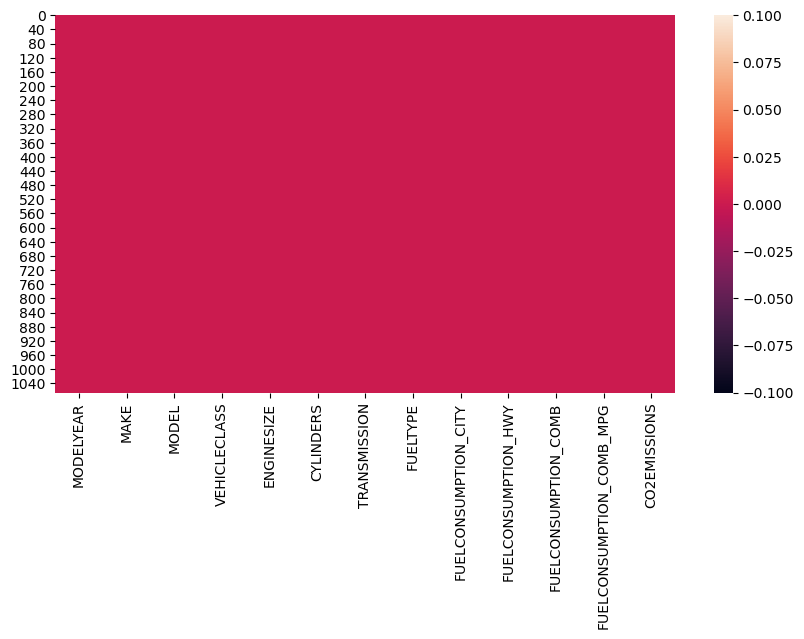

In [174]:
#checking null values
sns.heatmap(data=df.isna())

### Checking the different vehicle class

In [19]:
df["VEHICLECLASS"].value_counts()[:10]

MID-SIZE                   178
COMPACT                    172
SUV - SMALL                154
SUV - STANDARD             110
FULL-SIZE                   86
TWO-SEATER                  71
SUBCOMPACT                  65
PICKUP TRUCK - STANDARD     62
MINICOMPACT                 47
STATION WAGON - SMALL       36
Name: VEHICLECLASS, dtype: int64

In [36]:
#Making a proportion of top 10 and clubbing others in "OTHERS" 

In [27]:
CLASS_TYPES = pd.concat([df["VEHICLECLASS"].value_counts()[:10],pd.Series(df["VEHICLECLASS"].value_counts()[10:].sum(), index=["OTHERS"])])

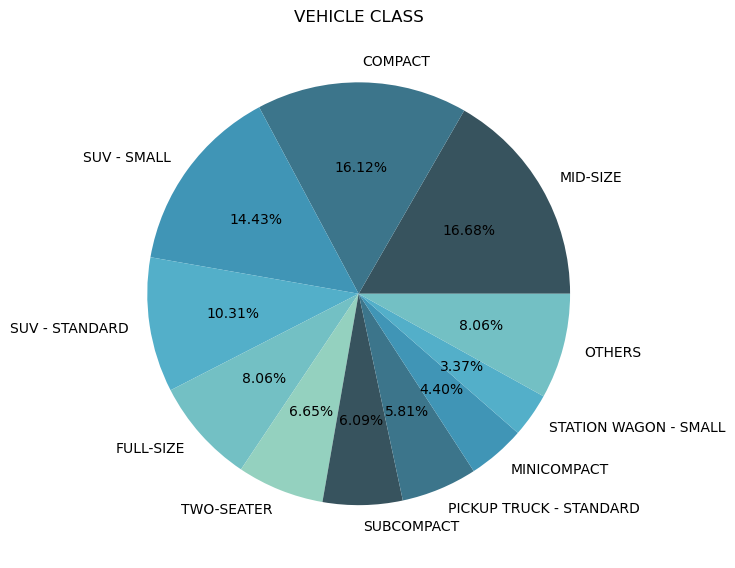

In [35]:
plt.rcParams['figure.figsize'] = 15, 7
plt.pie(CLASS_TYPES, labels=CLASS_TYPES.index,autopct="%.2f%%")
plt.title("VEHICLE CLASS")
plt.show()

### Checking the top used engine cylinders

In [39]:
CYLINDERS = df["CYLINDERS"].value_counts()

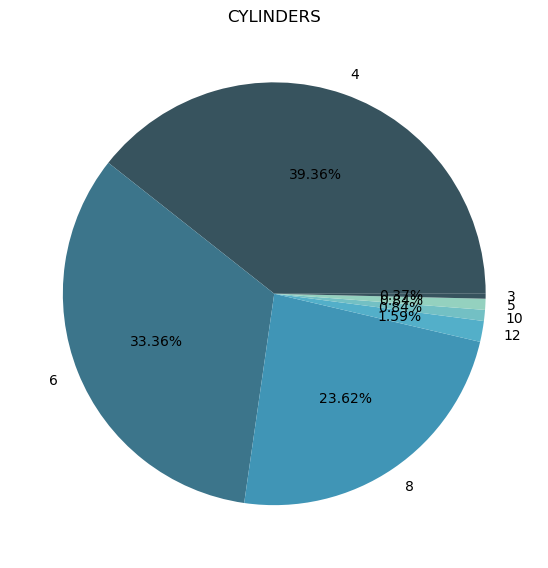

In [46]:
plt.rcParams['figure.figsize'] = 15, 7
plt.pie(CYLINDERS, labels=CYLINDERS.index,autopct="%.2f%%")
plt.title("CYLINDERS")
plt.show()

### Checking Fuel Type

In [48]:
FUEL = df["FUELTYPE"].value_counts()

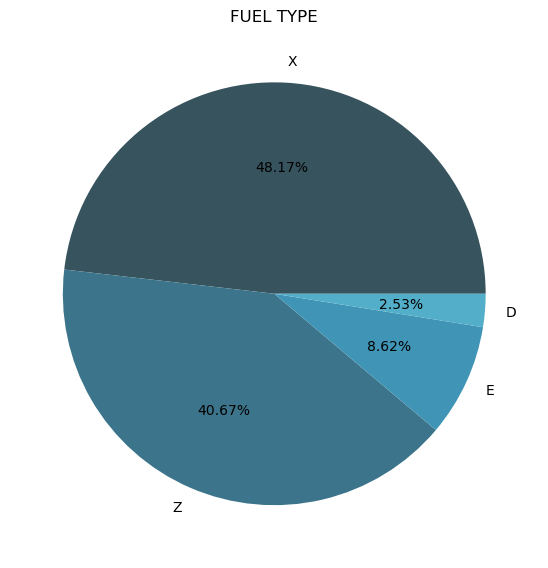

In [49]:
plt.rcParams['figure.figsize'] = 15, 7
plt.pie(FUEL, labels=FUEL.index,autopct="%.2f%%")
plt.title("FUEL TYPE")
plt.show()

### Checking the type of transmission used most

In [51]:
df["TRANSMISSION"].value_counts()

A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV      46
A4      45
AM7     34
Name: TRANSMISSION, dtype: int64

In [56]:
#Making a proportion of top 10 and clubbing others in "OTHERS" 

In [53]:
TRANSMISSION_TYPES = pd.concat([df["TRANSMISSION"].value_counts()[:10],pd.Series(df["TRANSMISSION"].value_counts()[10:].sum(), index=["OTHERS"])])

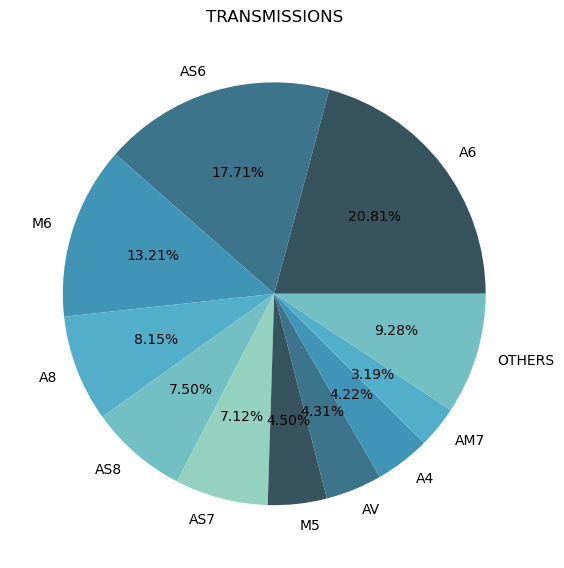

In [55]:
plt.rcParams['figure.figsize'] = 15, 7
plt.pie(TRANSMISSION_TYPES, labels=TRANSMISSION_TYPES.index,autopct="%.2f%%")
plt.title("TRANSMISSIONS")
plt.show()

### Checking the companies of which most of the cars are used

In [78]:
df["MAKE"].value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
AUDI             49
TOYOTA           49
GMC              49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
KIA              33
NISSAN           33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
LEXUS            22
JAGUAR           22
INFINITI         21
HONDA            21
LAND ROVER       19
CHRYSLER         19
BUICK            16
MITSUBISHI       16
RAM              13
ACURA            12
LINCOLN          11
VOLVO            11
FIAT             10
SCION             9
BENTLEY           8
ASTON MARTIN      7
ROLLS-ROYCE       7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64

In [87]:
#Making a proportion of top 30 and clubbing others in "OTHERS" 

In [85]:
CAR_COMPANIES = pd.concat([df["MAKE"].value_counts()[:30],pd.Series(df["MAKE"].value_counts()[30:].sum(), index=["OTHERS"])])

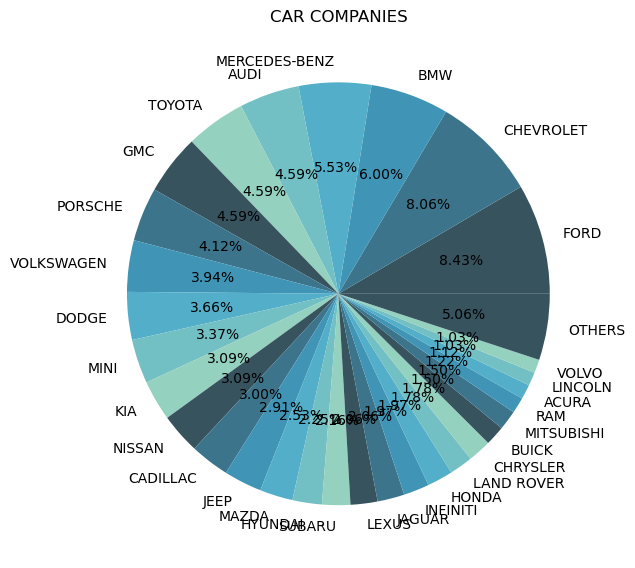

In [86]:
plt.rcParams['figure.figsize'] = 15, 7
plt.pie(CAR_COMPANIES, labels=CAR_COMPANIES.index,autopct="%.2f%%")
plt.title("CAR COMPANIES")
plt.show()

***

#### Interpretation of above analysis:

-   Around 45% of car class are "MID-SIZE, COMPACT, SUV"
-   Mostly Cars have 4, 6 or 8 cylinders
-   A6 type of fuel is used the most for approx 21% of time and AS6 for approx 18%.
-   X and Z fuel type covers around 90% of all cars. 
-   Mostly vehicles used are of company like chevrolet,BMW,Mercedes,Audi,Toyota and GMC

***

## Finding Appropriate features

In [187]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [188]:
df.corr()["CO2EMISSIONS"]

MODELYEAR                        NaN
ENGINESIZE                  0.874154
CYLINDERS                   0.849685
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_HWY         0.861748
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_COMB_MPG   -0.906394
CO2EMISSIONS                1.000000
Name: CO2EMISSIONS, dtype: float64

#### Using Pairplot to check the correlation of CO2Emission with other features

In [96]:
plt.rcParams['figure.figsize'] = 10, 5

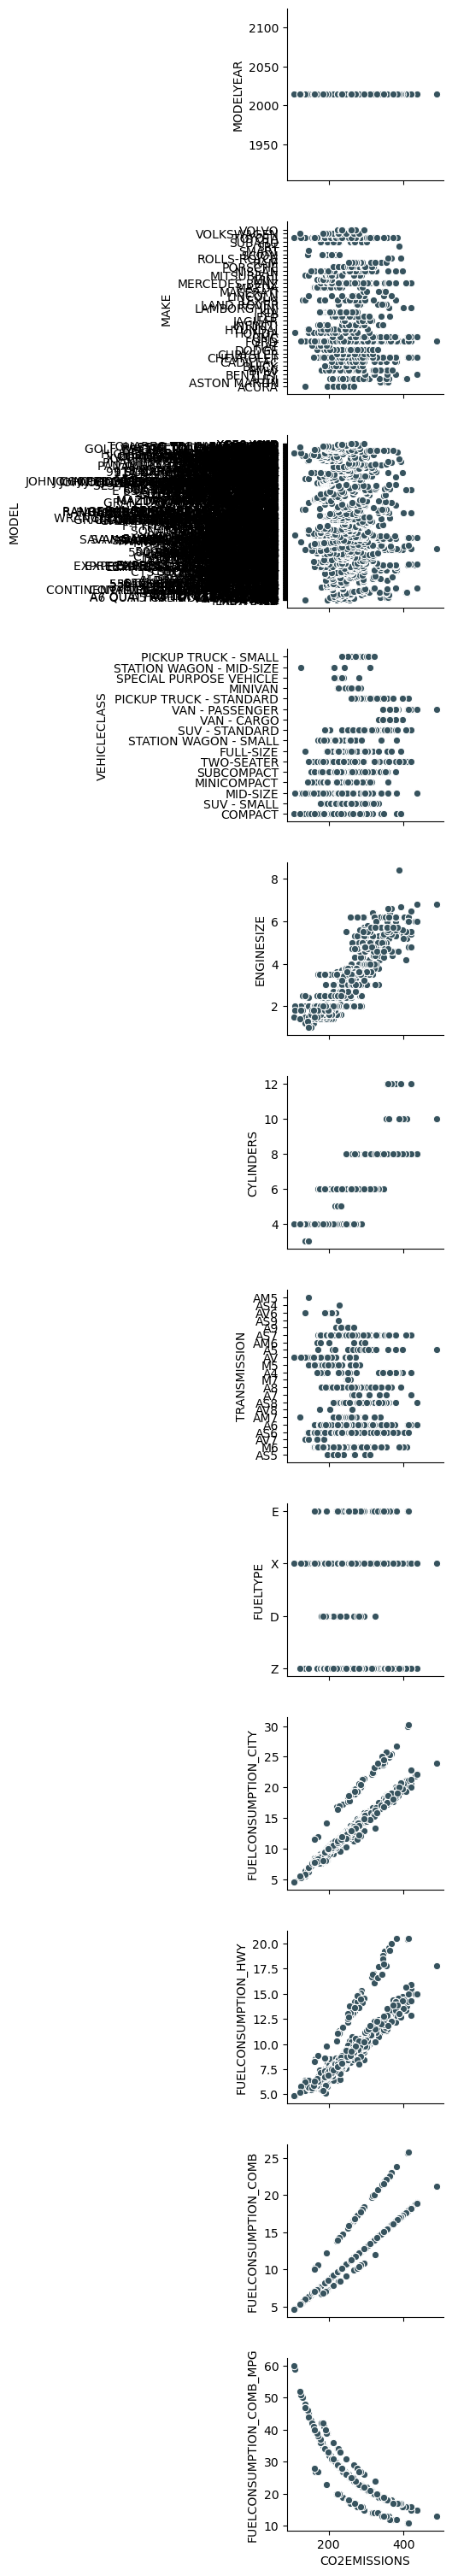

In [94]:
sns.pairplot(data=df,y_vars=['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG'], x_vars=["CO2EMISSIONS"])
plt.show()

### Checking the regplotbetween co2emission with engine size

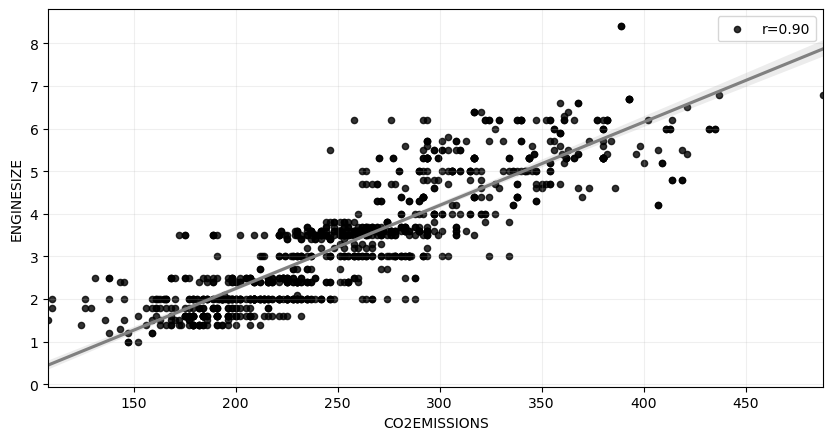

In [183]:
r= np.corrcoef(df["CO2EMISSIONS"], df["FUELCONSUMPTION_CITY"])[0, 1]
sns.regplot(data=df, x="CO2EMISSIONS", y="ENGINESIZE",
            scatter_kws={"color": "black",'s': 20},
            line_kws={"color": "gray"}, label = f"r={r:0.2f}")
plt.grid(axis='both', alpha=0.2)
plt.legend()
plt.show()

In [182]:
r

-0.9063942295226134

***
**As we can see the correlation between engine size and $CO_{2}$ emission, so we can say that engine size is an importnat feature to predict.**

***

### checking the regplot between co2emission and fuelconsumption in City

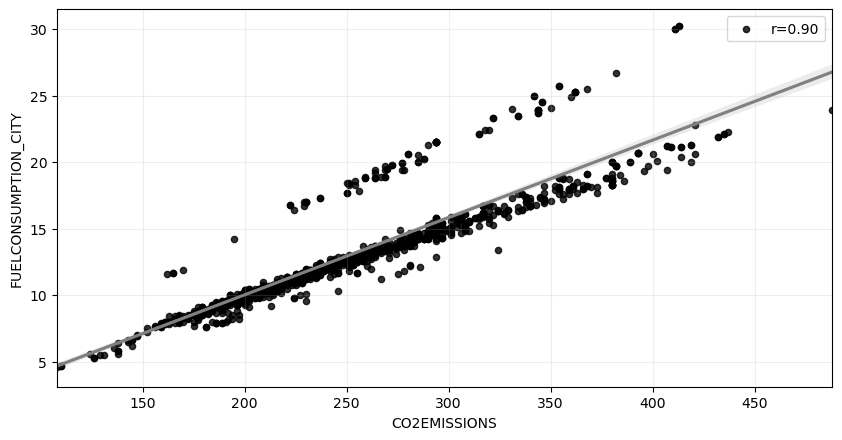

In [176]:
r = np.corrcoef(df["CO2EMISSIONS"], df["FUELCONSUMPTION_CITY"])[0, 1]
sns.regplot(data=df, x="CO2EMISSIONS", y="FUELCONSUMPTION_CITY",
            scatter_kws={"color": "black",'s': 20},
            line_kws={"color": "gray"}, label= f"r={r:0.2f}" )
plt.grid(axis='both', alpha=0.2)
plt.legend()
plt.show()

***
**As we can see the correlation between fuel comsumption in city and $CO_{2}$ emission, so we can say that it is an important feature to predict.**

***

### checking the regplot between co2emission and fuelconsumption on Highway

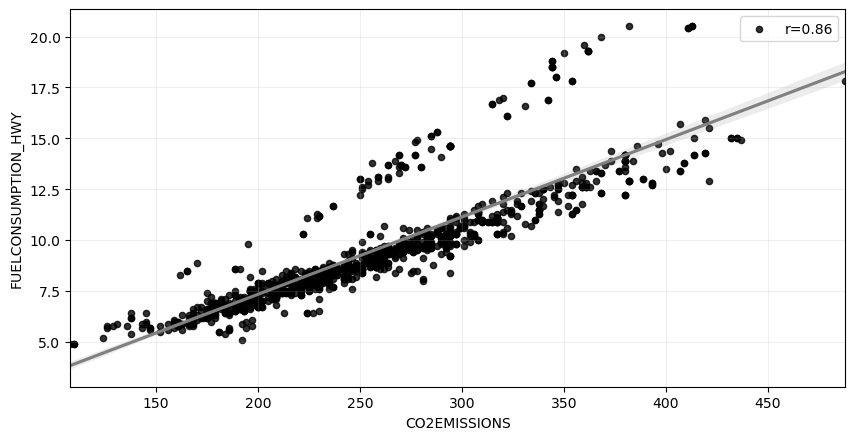

In [177]:
r = np.corrcoef(df["CO2EMISSIONS"], df["FUELCONSUMPTION_HWY"])[0, 1]
sns.regplot(data=df, x="CO2EMISSIONS", y="FUELCONSUMPTION_HWY",
            scatter_kws={"color": "black",'s': 20},
            line_kws={"color": "gray"}, label=f"r={r:0.2f}")
plt.grid(axis='both', alpha=0.2)
plt.legend()
plt.show()

***
**As we can see the correlation between fuel consumption on highway and $CO_{2}$ emission, so we can say that it is an importnat feature to predict.**

***

### checking the regplot betwen co2emissions and fuelconsumption_combine i.e city+highway

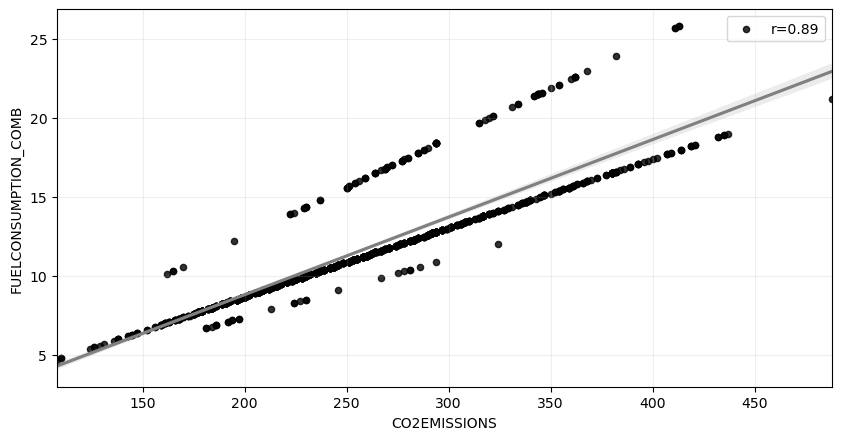

In [178]:
r = np.corrcoef(df["CO2EMISSIONS"], df["FUELCONSUMPTION_COMB"])[0, 1]
sns.regplot(data=df, x="CO2EMISSIONS", y="FUELCONSUMPTION_COMB",
            scatter_kws={"color": "black",'s': 20},
            line_kws={"color": "gray"},label=f"r={r:0.2f}" )
plt.grid(axis='both', alpha=0.2)
plt.legend()
plt.show()

***
**As we can see the correlation between fuel consumption combined(city+highway) and $CO_{2}$ emission, so we can say that it is an important feature to predict.**

***

### checking the regplot between co2emissions and fuelconsumption combine mpg

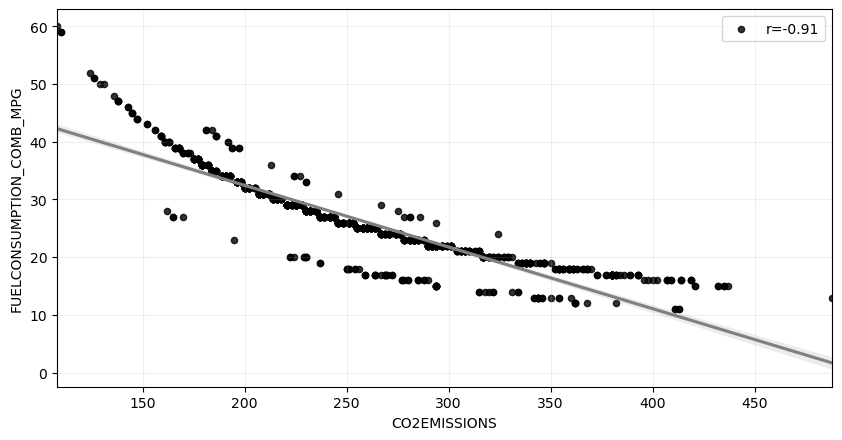

In [179]:
r = np.corrcoef(df["CO2EMISSIONS"], df["FUELCONSUMPTION_COMB_MPG"])[0, 1]
sns.regplot(data=df, x="CO2EMISSIONS", y="FUELCONSUMPTION_COMB_MPG",
            scatter_kws={"color": "black",'s': 20},
            line_kws={"color": "gray"}, label=f"r={r:0.2f}")
plt.grid(axis='both', alpha=0.2)
plt.legend()
plt.show()

***
**As we can see the correlation between fuel consumption combine mpg and $CO_{2}$ emission, so we can say that it is an important feature to predict.**

***

### checking the barplot between different cylinders and co2emissions

In [50]:
df["CYLINDERS"].value_counts()

4     420
6     356
8     252
12     17
10      9
5       9
3       4
Name: CYLINDERS, dtype: int64

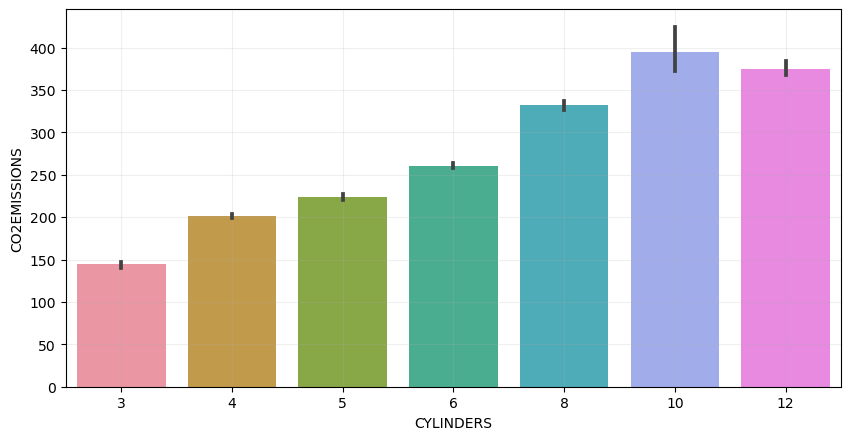

In [125]:
sns.barplot(data=df, x = "CYLINDERS",y= "CO2EMISSIONS")
plt.grid(axis='both', alpha=0.2)
plt.show()

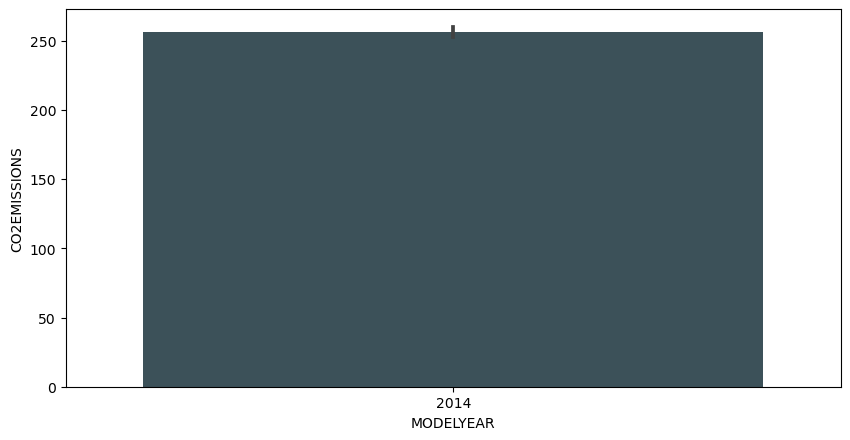

In [75]:
#the column should be dropped as it have no effects on the co2 emission
sns.barplot(data=df, x = "MODELYEAR",y= "CO2EMISSIONS")

### Checking the barplot between different vehicleclass and co2 emission"

In [53]:
df["VEHICLECLASS"].value_counts()

MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: VEHICLECLASS, dtype: int64

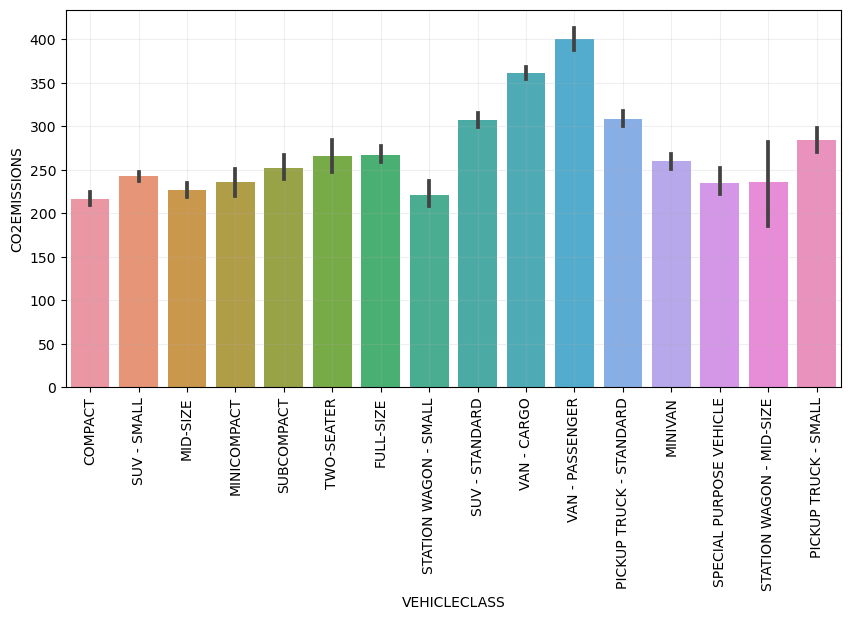

In [126]:
sns.barplot(data=df, x = "VEHICLECLASS",y= "CO2EMISSIONS")
plt.xticks(rotation=90)
plt.grid(axis='both', alpha=0.2)
plt.show()

### checking the barplot betwen transmission and co2emissions

In [55]:
df["TRANSMISSION"].value_counts()

A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV      46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AS9      2
AM5      2
AS4      1
Name: TRANSMISSION, dtype: int64

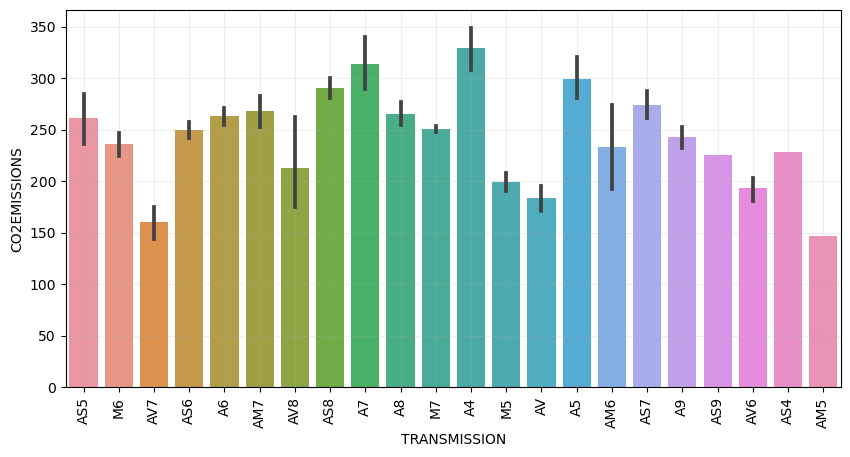

In [127]:
sns.barplot(data=df, x = "TRANSMISSION",y= "CO2EMISSIONS")
plt.xticks(rotation=90)
plt.grid(axis='both', alpha=0.2)
plt.show()

### Checking the barplot between between the fuel Type and co2emissions

In [57]:
df["FUELTYPE"].value_counts()

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

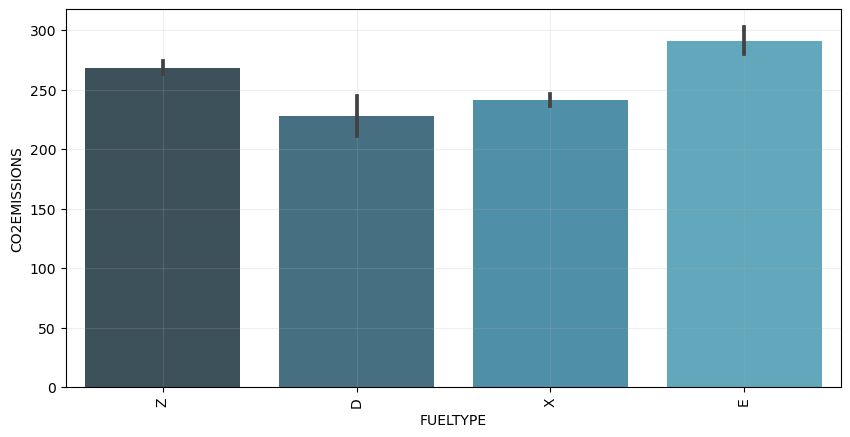

In [128]:
sns.barplot(data=df, x = "FUELTYPE",y= "CO2EMISSIONS")
plt.xticks(rotation=90)
plt.grid(axis='both', alpha=0.2)
plt.show()

***
**Here is a description of all Fuel Type codes:**

    X = regular gasoline
    Z = premium gasoline
    D = diesel
    E = ethanol (E85)
    
**We observe that the majority of vehicles in our dataset operate on gasoline.(X+Z)**

***

### dropping the unneccessary columns

In [130]:
data  = df.drop(columns=['MODELYEAR','MAKE','MODEL','TRANSMISSION'],axis=1)

In [131]:
data[:2]

,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,COMPACT,2.0,4,Z,9.9,6.7,8.5,33,196
1,COMPACT,2.4,4,Z,11.2,7.7,9.6,29,221


### checking the object class features

In [132]:
data.select_dtypes(include='object').columns

Index(['VEHICLECLASS', 'FUELTYPE'], dtype='object')

### checking the numerical features

In [133]:
data.select_dtypes(include=["int64","float64"]).columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

### Making a function to find out the Root mean squared error and Accuracy(r2 score)

In [134]:
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

def model_report(models, X_train, X_test, y_train, y_test):
    for name, model in models:
        model.fit(X_train, y_train)
        y_hat_train = model.predict(X_train)
        y_hat_test  = model.predict(X_test)
        print("_"*80)
        print(f"Report For {name}".center(80))
        print()
        print(f"Training RMSE Error: {rmse(y_train, y_hat_train):.2f}" )
        print(f"Test     RMSE Error: {rmse(y_test, y_hat_test):.2f}")
        print()
        print(f"Training Accuracy: {r2_score(y_train, y_hat_train):.2f}")
        print(f"Test     Accuracy: {r2_score(y_test, y_hat_test):.2f}")
        print('\n\n')
        
X = data.drop(["CO2EMISSIONS"], axis=1)
y = data["CO2EMISSIONS"]

### splitting the data into training and testing

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

#num_attr = X.select_dtypes(include=["float64","int64"]).columns
#obj_attr = X.select_dtypes(include="object").columns

### Differentiating the features into categorical and nummerical

In [163]:
num_attr=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG']
obj_attr=['VEHICLECLASS', 'FUELTYPE']

### Creating pipeline and using Linear Regression Model for the prediction

In [164]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')), #T1
        ('standard scaler', StandardScaler()), #T2
    ])
final_pipeline = ColumnTransformer([
        # (name, Transformer, column_list)
        ("numerical pipeline", num_pipeline, num_attr),
        ("categorical pipeline", OneHotEncoder(), obj_attr),
        
    ])

X_train_tr = final_pipeline.fit_transform(X_train)
X_test_tr  =  final_pipeline.transform(X_test)
models = [
        ('Linear Regression', LinearRegression()),
       ]

model_report(models, X_train_tr, X_test_tr, y_train, y_test)

________________________________________________________________________________
                          Report For Linear Regression                          

Training RMSE Error: 5.41
Test     RMSE Error: 5.10

Training Accuracy: 0.99
Test     Accuracy: 0.99





***

### So the accuracy comes out ot be 99% for both Training and Testing Data

***

***

**From the model performance metrics, it appears that 99% of the variance in the CO2 Emissions can be determined by the features within our model. While this model has good performance, we simplified the model by omitting several key categorical variables.**

***